# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


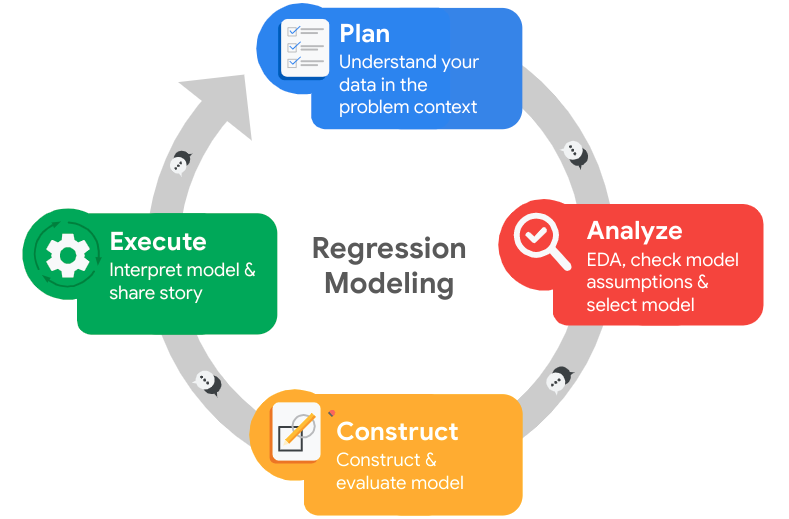

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stackholders are the top level managers at the HR department of Salifort Motors. The problem to solve is to build predictive 
model that gives a prediction of whether a employee will leave or not.

The initial observations are that the 'satisfaction_level' and 'last_evaluation' contains a binary format. The data given seems to be well presented and correlates well with the questions at hand. If there are deficits in data then this will have to be reported further within the Planning and analysing phase.

Number_projects employee contributed may be prejudice against new starters who is given least responsibilities at first. last-evaluation could also have some prejudice as it does not have a large scoring spectrum and only has binary format. This does not give enough information for representation of the overall staff performance.

## Step 1. Imports
*   Import packages
*   Load dataset



### Import packages

In [122]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [45]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [46]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [47]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [48]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [49]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [50]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [51]:
# Check for duplicates
df0.duplicated().sum()

3008

In [52]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].sum()

satisfaction_level                                                 1641.66
last_evaluation                                                    2147.07
number_project                                                       11442
average_monthly_hours                                               611676
tenure                                                               12122
work_accident                                                          319
left                                                                  1580
promotion_last_5years                                                  116
department               salesaccountingsalesRandDsalesITsalessalessale...
salary                   lowlowmediumlowlowlowlowlowlowlowmediummediuml...
dtype: object

In [53]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

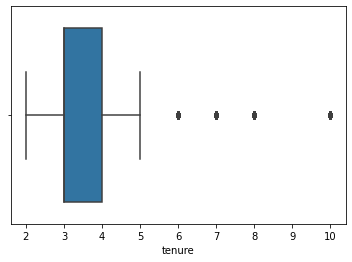

In [54]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])


In [55]:
# Determine the number of rows containing outliers

percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('number of rows containing outliers in tenure: ', len(outliers))

upper_limit:  5.5
lower_limit:  1.5
number of rows containing outliers in tenure:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [56]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print()
print()
print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

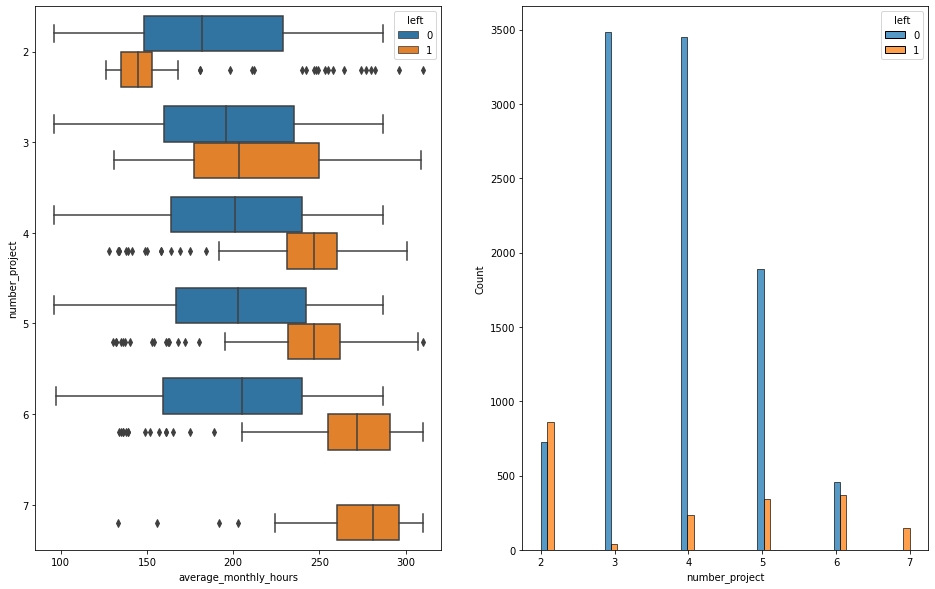

In [57]:
# Create a plot as needed
#Determine avg_monthly_hours spent on a number of projects.

fig, ax = plt.subplots(1,2, figsize = (16,10))

sns.boxplot(data= df1, x= 'average_monthly_hours', y= 'number_project', hue='left', orient="h", ax=ax[0])

sns.histplot(data = df1, x = 'number_project', multiple ='dodge', hue = 'left', ax=ax[1])

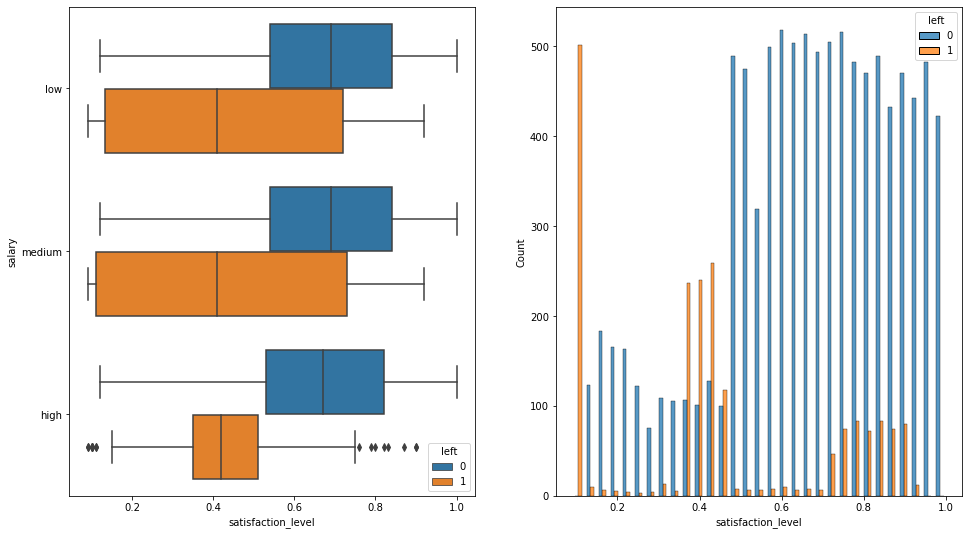

In [58]:
# Create a plot as needed
#df1.head()

fig, ax = plt.subplots(1, 2, figsize= (16, 9))
sns.boxplot(data = df1, x= 'satisfaction_level', y= 'salary', hue= 'left', orient='h', ax=ax[0])

sns.histplot(data = df1, x= 'satisfaction_level', multiple= 'dodge', hue= 'left', ax=ax[1], shrink= 0.6)

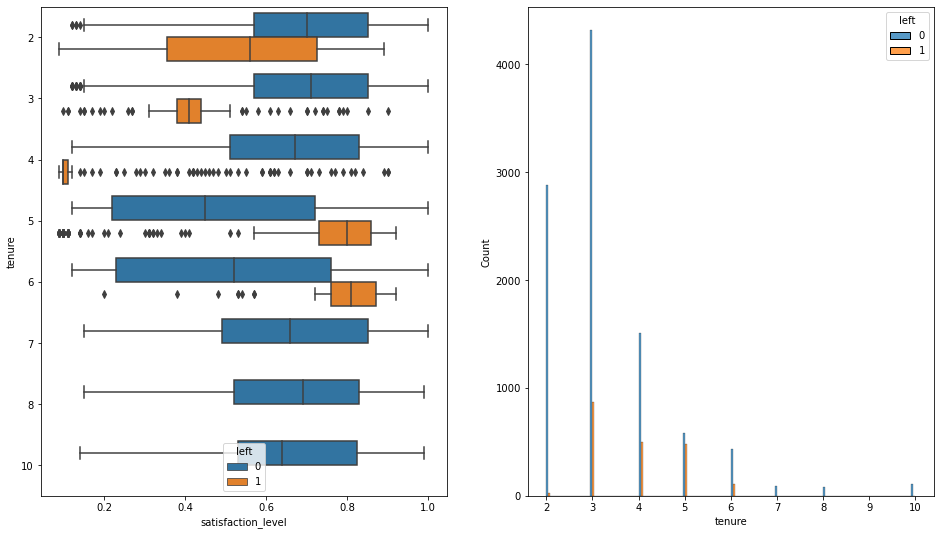

In [59]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize= (16, 9))

sns.boxplot(data = df1, x= 'satisfaction_level', y= 'tenure', hue= 'left', orient= 'h', ax= ax[0])

sns.histplot(data = df1, x= 'tenure', hue='left', multiple= 'dodge', ax=ax[1])

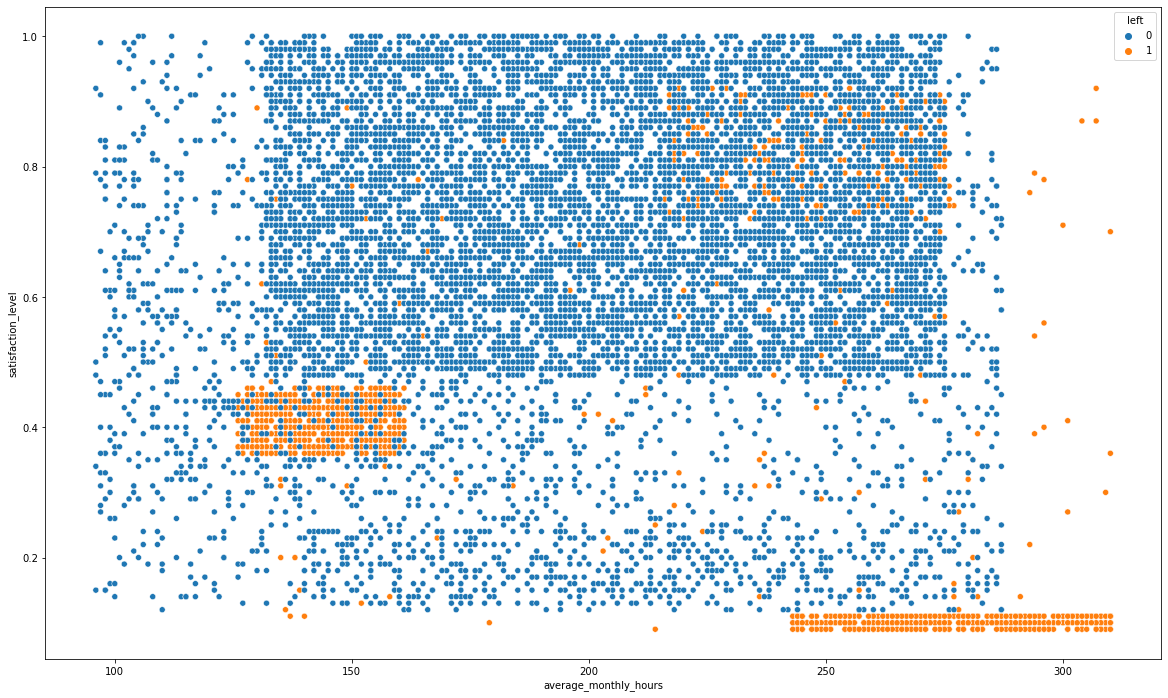

In [60]:
# Create a plot as needed
plt.figure(figsize= (20,12))
sns.scatterplot(data = df1, x= 'average_monthly_hours', y= 'satisfaction_level', hue= 'left')

plt.show()

IndexError: Column(s) last_evaluation already selected

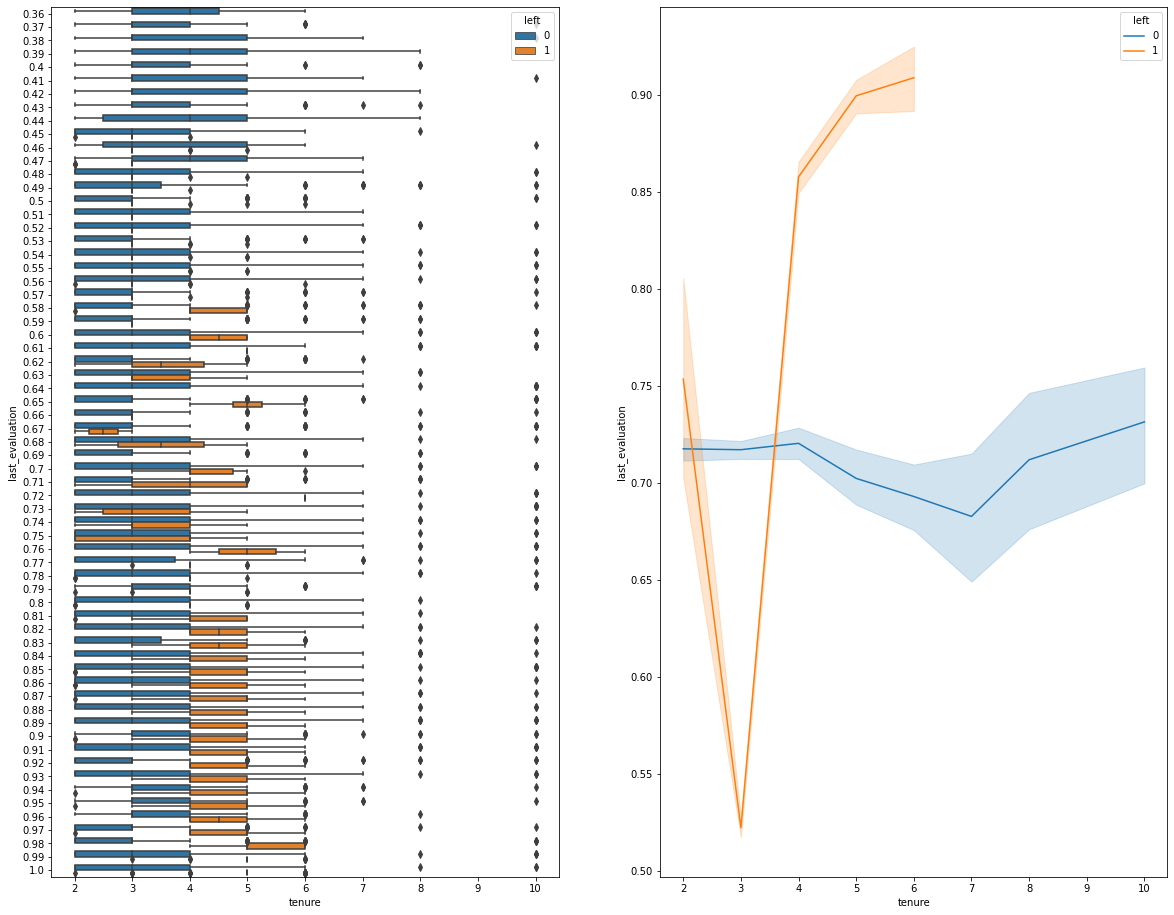

In [61]:
# Create a plot as neededprint(df1.head())

fig, ax = plt.subplots(1, 2, figsize= (20,16))

sns.boxplot(data = df1, x= 'tenure', y= 'last_evaluation', hue= 'left', orient= 'h', ax=ax[0])
sns.lineplot(data = df1, x= 'tenure', y= 'last_evaluation', hue= 'left', ax=ax[1])

df1.groupby('tenure')['last_evaluation']['left'].sum()

In [ ]:
# Create a plot as needed
sns.lineplot(data = df1, x= 'tenure', y= 'last_evaluation', hue= 'left')

In [ ]:
# Create a plot as needed
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)

df1.groupby('promotion_last_5years')['average_monthly_hours'].sum()

In [ ]:
# Create a plot as needed
#df1.head()
plt.figure(figsize=(12,10))
sns.histplot(data = df1, x= 'department', hue= 'left', multiple = 'dodge', discrete = 1, shrink = 0.4)


### Insights

The first 2 graphs are to determine the amount of average hours spent on the different number of projects. The data showcased in the boxplot that for the individuals who stayed at the compnay roughly spent the same average working hours of projects 1 - 5. On the other hand, the indivuals who left contained greater distribution of the average hours spent on the projects with projects 1-6. Also to note that the individuals who left on the corrleating projetcs had a tighter distrubtion when compared with employees who stayed. An observation is that there are no employees who stayed at the company that worked on number of projects 7-9. this could indicate that projects number of 7 and above could lead to lower job satisfaction.

Looking at the second set of subplots, the salary bracket plotted against the satisfaction level indicated that there is substantial distribution of past employees across low and medium pay brackets with satisfaction level below 0.8. It would be important to focus more on these two groups. Interestingly there is a tighter distribution of past employees from 0.35 to below 0.6 satisfaction level but it is important to note that the median satisfaction level shared across all pay brackets where between 0.4 and 0.5 for employees that had left the company. This can be compared against the median satisfaction across all brackets reaching between 0.7 - 0.8.
Overall the are more counts of employees who stayed ranging from 0.5-1.0 than past employees.

For the 3rd set of subplots, the wasa adirection of measure of Tenure across the satisfaction level. The box plot indicated that the only tenure years 2, 3, 4, 5, 6. The 2 year tenure had the greatest distribution of the boxplot for past employees. These results indicate that the the tenure years listed, are the years where employees are more likely to leave the company. For further analysis, the accompanying Histogram indicates that teure year 3 had the greatest count of emplyoees leeaving the company.

The scatterplot indicated that employees who worked from 120-170 average monthly hours correlated to a range from 0.3 - 0.5 satisfaction level. Next a nother collection (although widely spread) contained satisfaction from 0.7 - 1.0 for a range of 220-280 average monthly hours. Lastly there was a tight distribution of average monthly hours from 240-325 matching below 0.2 satisfaction levels. ALl values states are for past employees indicating the range of average monthly hours which may indicate an issue for a drop in satisfaction levels.

Next the line plot indicated that past employees had a range of tenure between 2-6 but intersetngly the was a substabital dip in performance (from last evaluation) ranging from 2-3 tenure years but had a drastic shift in records, where an drastic increase in performance from year 3-4 with plateau from 4-6. This could indicate that high perforing employees left the company after a high evaluation metirc at estimated 3-4 year tenure.



# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



From preliminary exploration in the Analyze phase, the was no clear answer as to which factor influenced employees leaving the company. Although in most cases seen by the histogram, there was tight distribution of ratings of Satisfaction aginst the Average monthly hours.

The independant variables chosen where 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure'. This is because these variables correlated greatly to the dependant variable, 'left'.

Assumptions have been met as the categorical variables can be converted into binary through pd.get.dummies, or cat.codes (for ordinal values). The independant variables are truly independant as can be seen by the heatmap.

I would do some feature engineering to transform a new column into overworked. But to do this the Overworked hours will have to be determined before hand as it could differ between counties evaluation.

I utilse the Google data analytics course to detemrmine the parameters and develop my knowledge on how the parameters could be used.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

I think Logistic regression will be most suitable for this task. This is because the target variable, 'left' has binary classification (1 = left, 0 = stayed) which suits this predicitve model.

### Identify the types of models most appropriate for this task.

There are 2 models which could aid in this task being Logistic regression or Decision trees. I will be performing and compiling both models in order to develop my skills and for a point comparison against the appropriate metrics.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [62]:
print(df1.info())
#Both department and salary columns are categorical. To convert this i could utilise dummies for these 
#columns but 'Salary' is a ordinal value and needs to be handled appropriately 
df_conv = df1.copy()

df_conv['salary'] = (
    df_conv['salary'].astype('category')
    .cat.set_categories(['low','medium' , 'high'])
    .cat.codes
)

df_conv = pd.get_dummies(df_conv, columns=['department'])

print()
df_conv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB
None



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


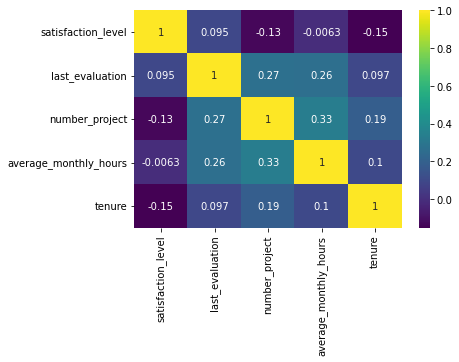

In [63]:
#To identify any correlations between the variables, a heatmap could be used to visualise the correlation.
sns.heatmap(df_conv[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="viridis")

#.corr() is used to determine the correlation matrix of the values.

In [64]:
#Next would be to remove any outliers in the Tenure column. Tenure is an essential column for logistic regression. 
#This is because Logistic regression is sensitive to outliers.

df_logreg = df_conv[(df_conv['tenure'] >= lower_limit) & (df_conv['tenure'] <= upper_limit)]

df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary                  11167 non-null  int8   
 9   department_IT           11167 non-null  uint8  
 10  department_RandD        11167 non-null  uint8  
 11  department_accounting   11167 non-null  uint8  
 12  department_hr           11167 non-null  uint8  
 13  department_management   11167 non-null  uint8  
 14  department_marketing    11167 non-null

In [65]:
#Begin classifying the X and y values for logistic regression.
#assin the training and test values.

y = df_logreg['left']

X = df_logreg.drop('left', axis = 1)
X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   promotion_last_5years   11167 non-null  int64  
 7   salary                  11167 non-null  int8   
 8   department_IT           11167 non-null  uint8  
 9   department_RandD        11167 non-null  uint8  
 10  department_accounting   11167 non-null  uint8  
 11  department_hr           11167 non-null  uint8  
 12  department_management   11167 non-null  uint8  
 13  department_marketing    11167 non-null  uint8  
 14  department_product_mng  11167 non-null

In [66]:
clf = LogisticRegression(random_state= 42, max_iter = 500).fit(X_train, y_train)

#I would of originally sticked with the max_iter = 100 but this caused an attribute error. To correct this max_iter = 500.

In [67]:
y_pred = clf.predict(X_test)

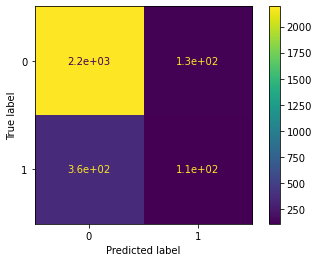

In [68]:
log_confm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp_log_confm = ConfusionMatrixDisplay(confusion_matrix = log_confm, display_labels = clf.classes_)

disp_log_confm.plot()

In [123]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



### Decision Trees modeling


In [70]:
#Set the X and y axis variables for the Decision tree.
y = df_logreg['left']

X = df_logreg.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 0)

In [107]:
decision_tree = DecisionTreeClassifier(random_state = 0)

cv_parameter = {'max_depth' : [6, 8, 10, 12],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [4, 6, 8],
               }

scoring = {'precision', 'accuracy', 'f1', 'recall', 'roc_auc'}

deci_tree = GridSearchCV(decision_tree, cv_parameter, scoring = scoring, cv = 5, refit = 'roc_auc')

In [108]:
%%time

deci_tree.fit(X_train, y_train)

CPU times: user 3.67 s, sys: 5.42 ms, total: 3.67 s
Wall time: 3.67 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [3, 4, 5],
                 

In [109]:
print(deci_tree.best_params_)
print()
print('Best score for decision tree: ', deci_tree.best_score_)

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}

Best score for decision tree:  0.9728975247624261


In [110]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    max_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = max_estimator_results.mean_test_roc_auc
    f1 = max_estimator_results.mean_test_f1
    recall = max_estimator_results.mean_test_recall
    precision = max_estimator_results.mean_test_precision
    accuracy = max_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [111]:
#Gather all the Cross Valuation scores
deci_tree_cv_results = make_results('decision_tree_cv', deci_tree, 'auc')


### Random Forest modeling


In [112]:
randomfor = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_parameters = {'max_depth': [2, 3, 6, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [150, 300, 500],
             }  

scoring = {'precision', 'accuracy', 'f1', 'recall', 'roc_auc'}

random_forest = GridSearchCV(randomfor, cv_parameters, cv=5, scoring=scoring, refit='roc_auc')

random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [113]:
# Gather all Random Forest CV scores
random_forest_cv_results = make_results('random forest cv', random_forest, 'auc')
print(deci_tree_cv_results)
print(random_forest_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision_tree_cv   0.973695  0.915665  0.943711  0.981612  0.972898
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.979472  0.912117  0.944511   0.98197  0.981053


Random forest had achieved moderately better results in the metrics - Precision, F1, Accuracy, and AUC. The Decision tree has moderately higher recall statistics. Random forest being the best performer for the obejctive wil be tested further with the test data.

In [114]:
#This function is utilised to extract the target scores from the model. The function utilises the X_test, y_test data - 
# - in order to retrieve final model results.

def make_test_resuts(model_name:str, model, X_test_data, y_test_data):
    
    predict = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, predict)
    accuracy = accuracy_score(y_test_data, predict)
    precision = precision_score(y_test_data, predict)
    recall = recall_score(y_test_data, predict)
    f1 = f1_score(y_test_data, predict)

    
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table
    

In [115]:
rf1_test_scores = make_test_resuts('random forest1 test', random_forest, X_test, y_test)
rf1_test_scores

,model,precision,recall,F1,accuracy,auc
0,random forest1 test,0.975391,0.92569,0.949891,0.983524,0.960475


## Decision tree splits.
This can be used to determine the important factors which has correlated to the count of employees who has left the company.

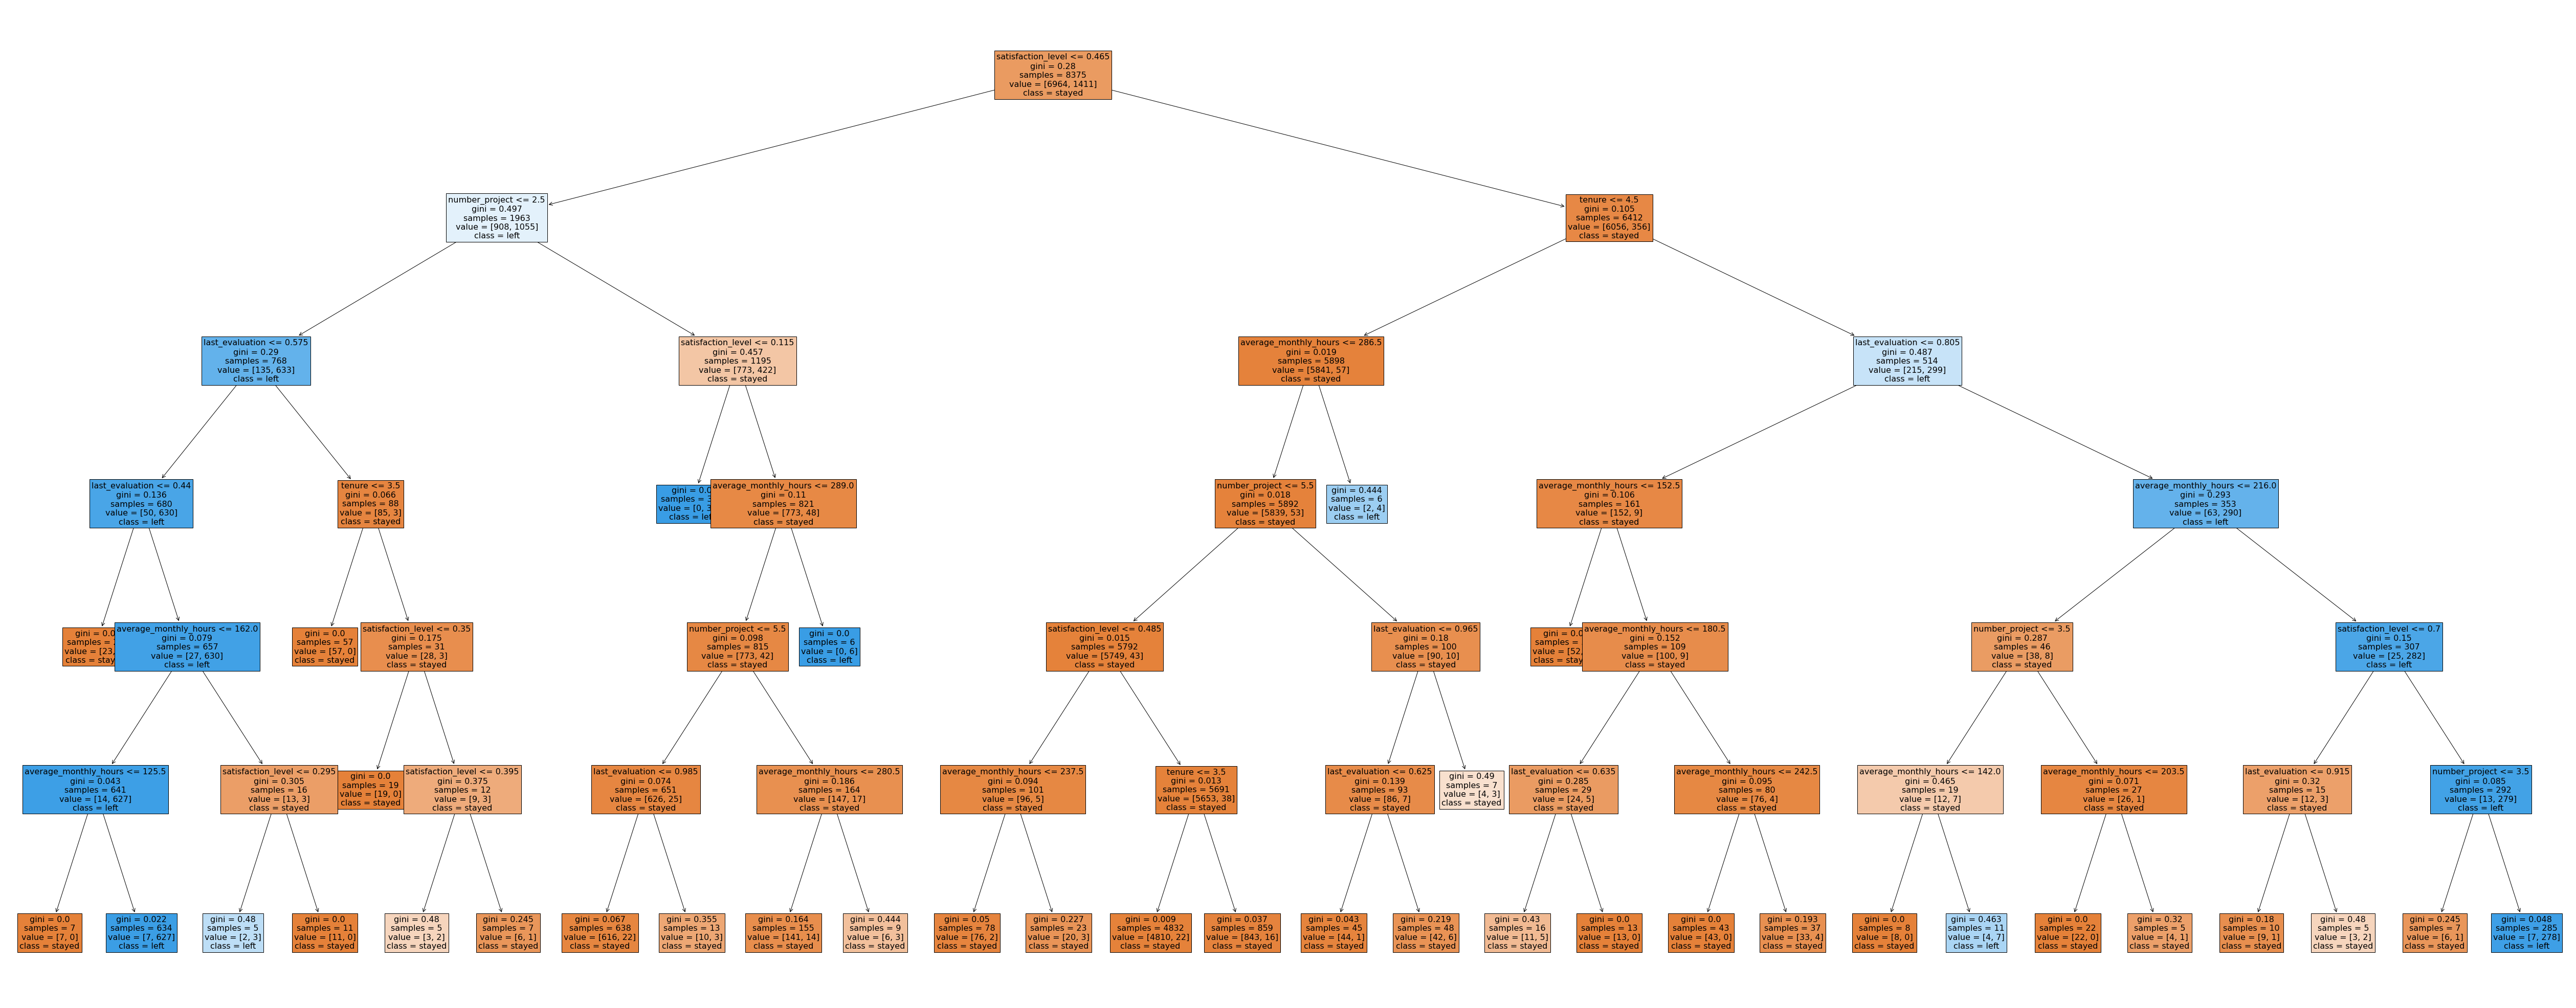

In [116]:
plt.figure(figsize = (90, 36))
plot_tree(deci_tree.best_estimator_, filled = True, max_depth = 6, fontsize = 16, feature_names = X.columns, 
          class_names={0:'stayed', 1:'left'})
plt.show()

#Double click to view in depth.

In [117]:
deci_tree_importance = pd.DataFrame(deci_tree.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)

deci_tree_importance = deci_tree_importance.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
deci_tree_importance = deci_tree_importance[deci_tree_importance['gini_importance'] != 0]
deci_tree_importance

,gini_importance
satisfaction_level,0.557367
tenure,0.147212
last_evaluation,0.142270
number_project,0.105497
average_monthly_hours,0.047654


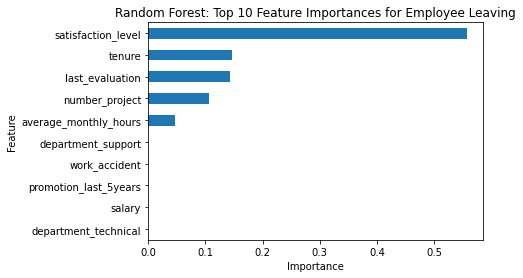

In [121]:
# Get feature importances from the best estimator
feat_impt = deci_tree.best_estimator_.feature_importances_

# Get indices of top 10 features with the highest importances
top_indices = np.argsort(feat_impt)[-10:]

# Extract top 10 feature labels
top_features = X.columns[top_indices]

# Extract top 10 feature importances
top_importances = feat_impt[top_indices]

# Create a DataFrame with top features and importances
top_features_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

# Sort the DataFrame by Importance
top_features_df = top_features_df.sort_values(by='Importance')

# Create a horizontal bar plot
ax = top_features_df.plot(kind='barh', x='Feature', y='Importance', legend=False)

# Set plot title and labels
ax.set_title('Random Forest: Top 10 Feature Importances for Employee Leaving', fontsize=12)
ax.set_ylabel("Feature")
ax.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### 💭
### Reflect on these questions as you complete the executing stage, Conclusion, Recommendations & Next Steps.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The key insights can be seen through the 'Random Forest: Top 10 Feature Importances for Employee Leaving', that the graph indicates Satisfaction taking the lead in importance followed by tenure, last evaluation, number_project and monthly hours. It appears that the Satisfaction rating needs to be closely cared for within the workplace and a thorough report with answers from a survey (from past and current employees) could indicate key areas of development to improve satisfaction rating.

Other recommendations could include ensuring that there is a hard cap for employees in the number of projects that can be undertaken at any given time. Last evaluation metrics need to be looked into with more data. With the given data provided, it could be considered that the feedback given is not well received or constructive feedback needs to be given to help drive morale within the workplace and to develop a healthy workplace where directions are given to help strive for better performance.

Another indication from the Analysis showed that promotion is scarcely provided and that a system could be developed to help nurture individuals with a proven track record for promotion into various sectors.

Future Questions could be written in a survey format in order to gain data directly from the employees and also to provide monitoring of current and prediction of future scenarios. If this survey feature was implemented, anonymity will be ensured to prevent current and past employee discrimination for ethical standards.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

###Logistic Regression

The logistic regression model achieved precision of 79%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set. 

###Tree-based Machine Learning

the decision tree model achieved AUC of 97.2%, precision of 97.4%, recall of 91.5%, f1-score of 94.4%, and accuracy of 98.2%, on the test set. The random forest modestly outperformed the decision tree model. The high statistics could indicate overfitting of the data.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.